# Problem Statement
Does travel affect performance  of a team? 

In [293]:
# imports 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [294]:
pd.set_option('display.max_columns', None)

In [295]:
# File path for csv File
filepath = "./../data/processed/astro_df_with_features.csv"
astro_df = pd.read_csv(filepath, index_col=0, parse_dates=True)

C:\Users\Hung Bui\AppData\Local\Temp\ipykernel_10452\106544783.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  astro_df = pd.read_csv(filepath, index_col=0, parse_dates=True)


In [296]:
astro_df.head()

,game_date,home_team,away_team,is_day_game,home_score,away_score,venue,venue_name,city,state,away_pa,away_1b,away_2b,away_3b,away_hr,away_fo,away_so,away_bb,away_hbp,home_pa,home_1b,home_2b,home_3b,home_hr,home_fo,home_so,home_bb,home_hbp,home_ops,away_ops,home_restdays,away_restdays,home_consecutiveGames,away_consecutiveGames,home_distancetravelled,away_distancetravelled
0,2000-03-29,NYN,CHN,False,3,5,TOK01,Tokyo Dome,Tokyo,JAP,45,9,1,0,2,17,5,10,1,38,5,1,0,1,24,4,3,0,0.577444,1.069935,0,0,0,0,0.0,0.0
1,2000-03-30,CHN,NYN,False,1,5,TOK01,Tokyo Dome,Tokyo,JAP,48,3,2,0,1,28,5,8,1,44,5,0,0,0,24,9,6,0,0.381579,0.594551,0,0,1,2,0.0,0.0
2,2000-04-03,ATL,COL,True,2,0,ATL02,Turner Field,Atlanta,GA,34,4,2,0,0,19,7,2,0,32,5,0,0,2,17,6,1,1,0.714583,0.485294,0,0,0,0,0.0,0.0
3,2000-04-03,CIN,MIL,True,3,3,CIN08,Cinergy Field,Cincinnati,OH,27,6,1,0,0,14,1,5,0,20,3,1,0,1,10,4,1,0,0.773684,0.808081,0,0,0,0,0.0,0.0
4,2000-04-03,FLO,SFN,False,6,4,MIA01,Sun Life Stadium,Miami,FL,36,5,2,2,1,17,8,1,0,38,9,3,0,0,17,7,1,1,0.785088,0.848413,0,0,0,0,0.0,0.0


In [297]:
astro_df.shape

(56775, 36)

### Missing Data

In [298]:
# check for missing data
astro_df.isna().sum()

game_date                  0
home_team                  0
away_team                  0
is_day_game                0
home_score                 0
away_score                 0
venue                      0
venue_name                 0
city                       0
state                      0
away_pa                    0
away_1b                    0
away_2b                    0
away_3b                    0
away_hr                    0
away_fo                    0
away_so                    0
away_bb                    0
away_hbp                   0
home_pa                    0
home_1b                    0
home_2b                    0
home_3b                    0
home_hr                    0
home_fo                    0
home_so                    0
home_bb                    0
home_hbp                   0
home_ops                   0
away_ops                   0
home_restdays              0
away_restdays              0
home_consecutiveGames      0
away_consecutiveGames      0
home_distancet

In [299]:
# This cell is to remove all outliers

# for i in astro_df.columns[1:]:
#     if pd.api.types.is_numeric_dtype(astro_df[i]) and not pd.api.types.is_bool_dtype(astro_df[i]):
#         q25, q75 = np.percentile(astro_df[i], 25), np.percentile(astro_df[i], 75)
#         iqr = q75 - q25
    
#         cut_off = iqr * 1.5
#         lower = q25 - cut_off
#         upper = q75 + cut_off
    
#         astro_df = astro_df[(astro_df[i] > lower) | (astro_df[i] < upper)]
# astro_df.shape

In [300]:
astro_df = astro_df[astro_df["state"] != "JAP"]

In [301]:
# Remove duplicates if any
astro_df.drop_duplicates().shape

(56765, 36)

In [302]:
# Numeric columns
numeric = astro_df.select_dtypes(include=["int64", "float64"])
numeric

,home_score,away_score,away_pa,away_1b,away_2b,away_3b,away_hr,away_fo,away_so,away_bb,away_hbp,home_pa,home_1b,home_2b,home_3b,home_hr,home_fo,home_so,home_bb,home_hbp,home_ops,away_ops,home_restdays,away_restdays,home_consecutiveGames,away_consecutiveGames,home_distancetravelled,away_distancetravelled
2,2,0,34,4,2,0,0,19,7,2,0,32,5,0,0,2,17,6,1,1,0.714583,0.485294,0,0,0,0,0.00000,0.0
3,3,3,27,6,1,0,0,14,1,5,0,20,3,1,0,1,10,4,1,0,0.773684,0.808081,0,0,0,0,0.00000,0.0
4,6,4,36,5,2,2,1,17,8,1,0,38,9,3,0,0,17,7,1,1,0.785088,0.848413,0,0,0,0,0.00000,0.0
5,4,10,43,6,0,1,2,26,4,4,0,38,7,0,0,2,19,8,2,0,0.706140,0.738223,0,0,0,0,0.00000,0.0
6,2,1,33,4,0,0,1,19,8,0,1,30,2,1,0,1,16,7,2,1,0.529630,0.431818,4,0,0,0,5851.33798,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56770,1,2,44,6,1,0,0,22,8,7,0,44,7,0,0,0,17,16,3,1,0.425000,0.534398,0,0,41,42,0.00000,0.0
56771,5,2,34,3,1,0,1,20,8,1,0,38,4,4,0,1,16,7,6,0,0.894737,0.449198,0,0,43,44,0.00000,0.0
56772,5,2,35,4,3,0,0,18,7,3,0,35,7,0,1,3,15,8,1,0,0.989916,0.598214,0,0,45,46,0.00000,0.0
56773,1,0,30,3,1,0,0,15,11,0,0,30,4,0,0,0,14,10,1,1,0.342857,0.300000,0,0,47,48,0.00000,0.0


c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


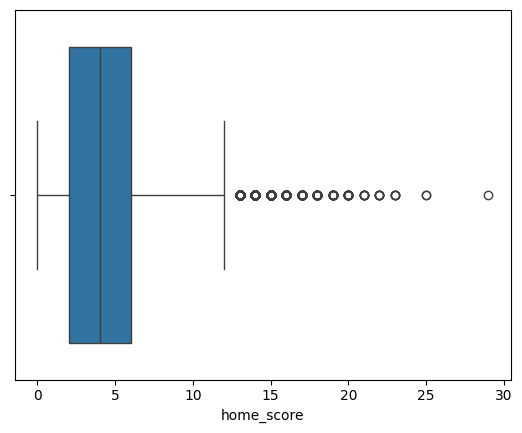

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


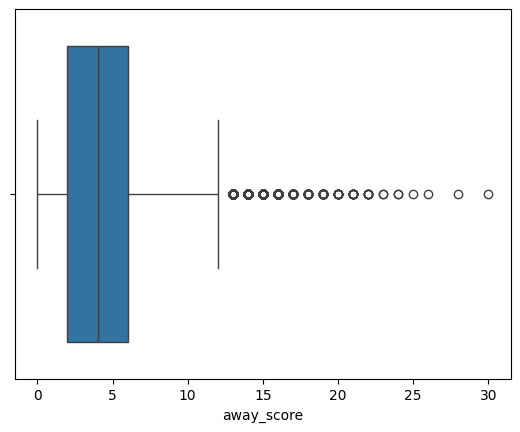

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


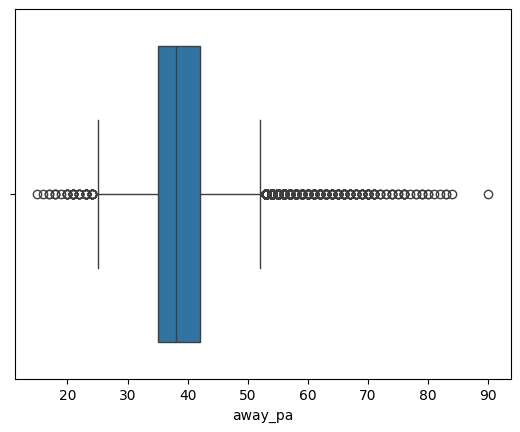

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


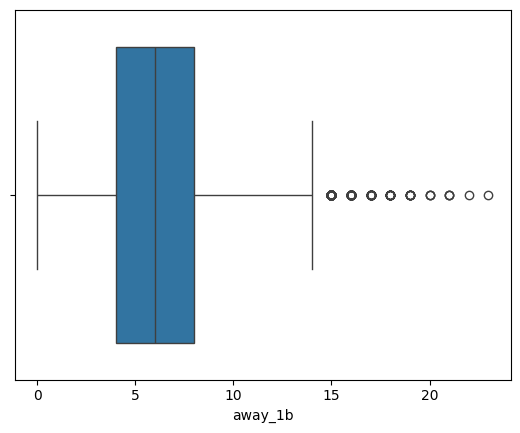

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


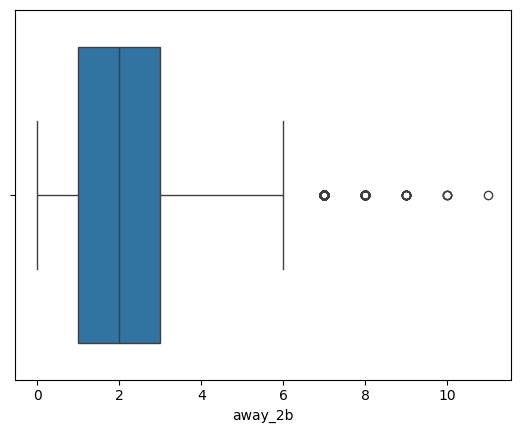

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


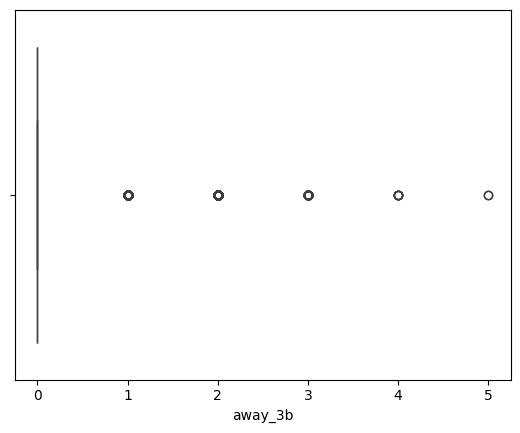

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


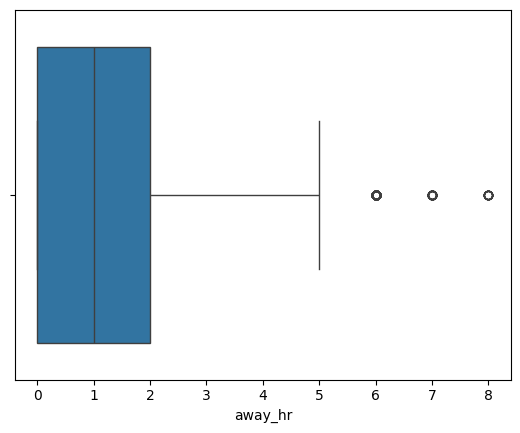

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


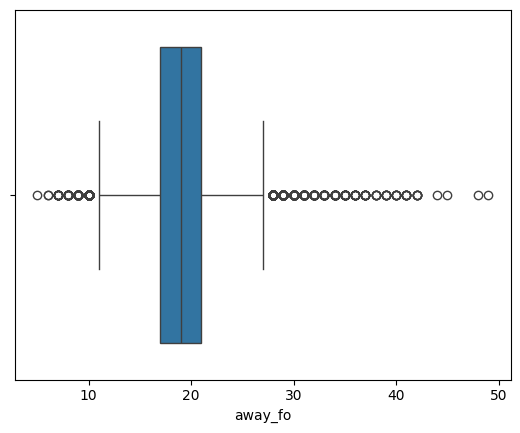

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


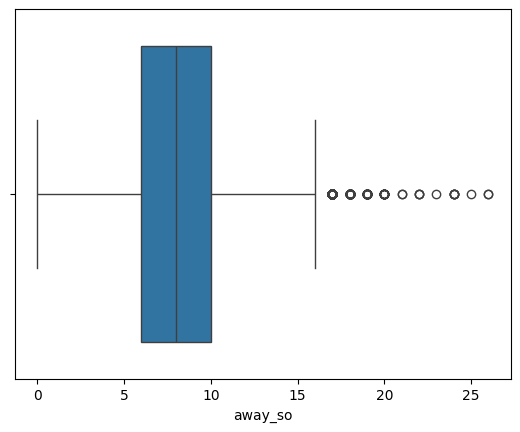

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


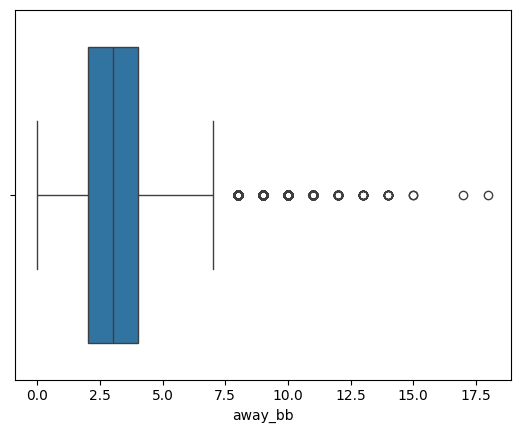

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


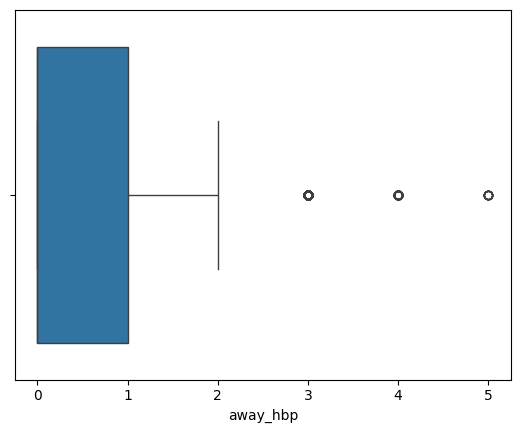

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


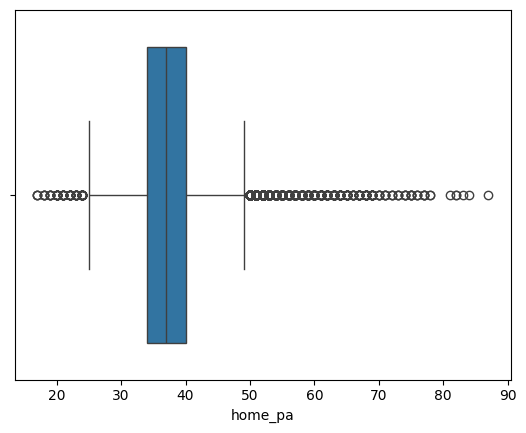

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


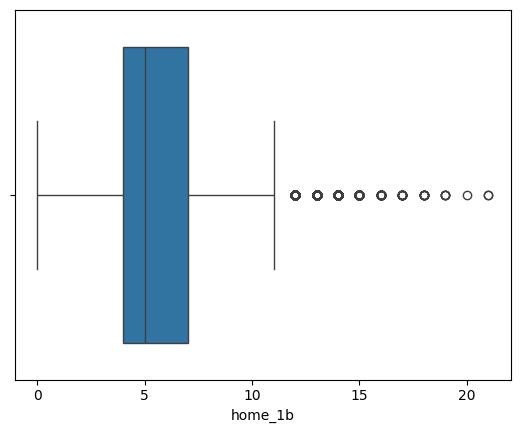

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


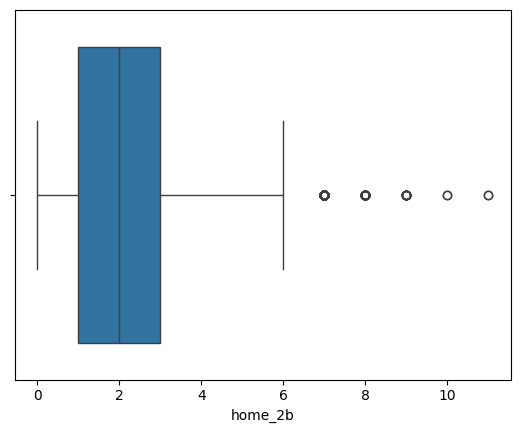

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


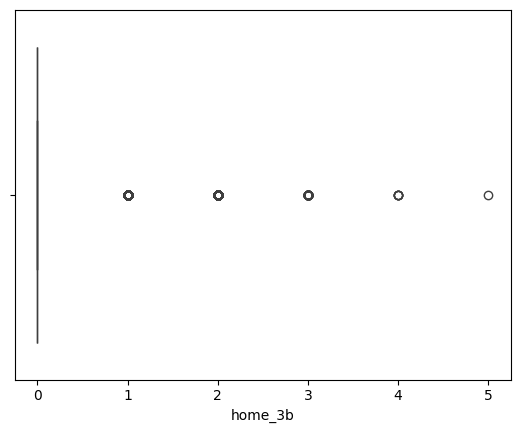

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


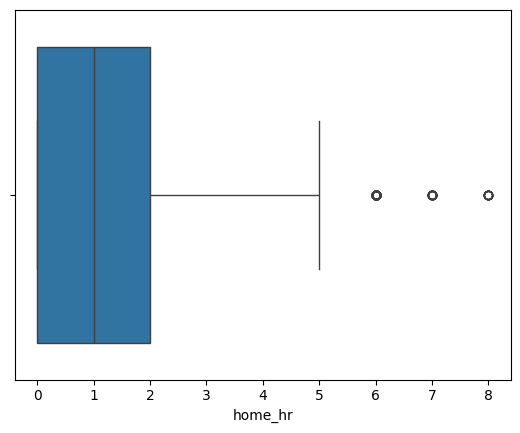

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


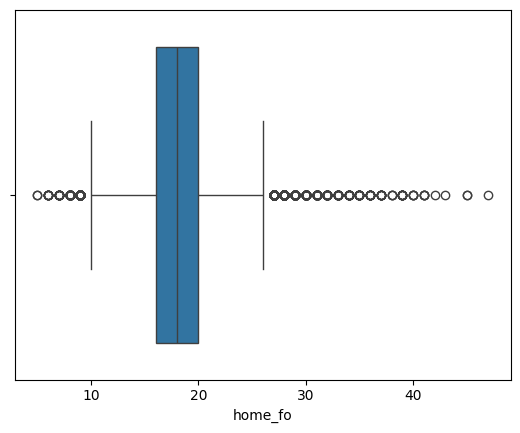

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


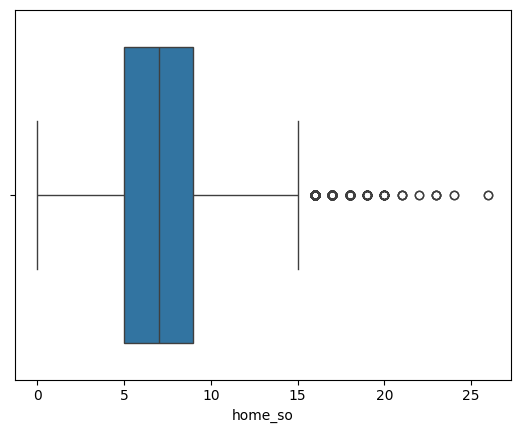

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


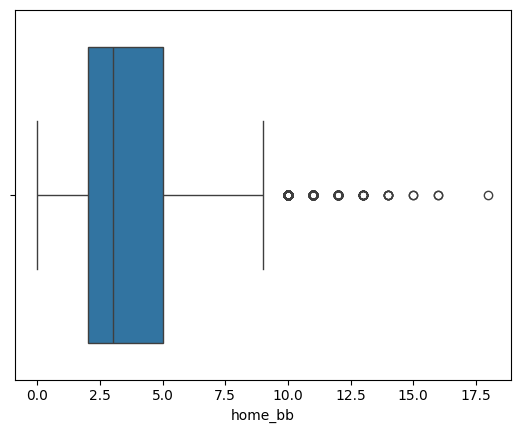

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


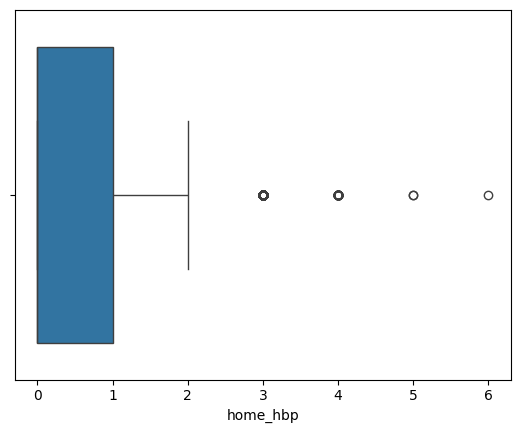

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


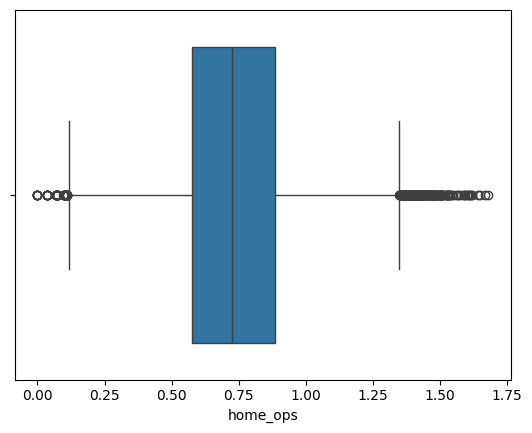

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


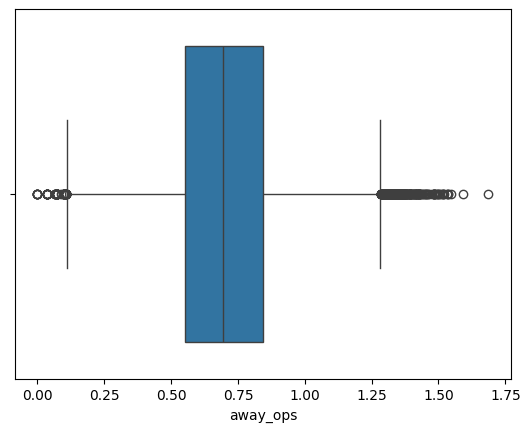

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


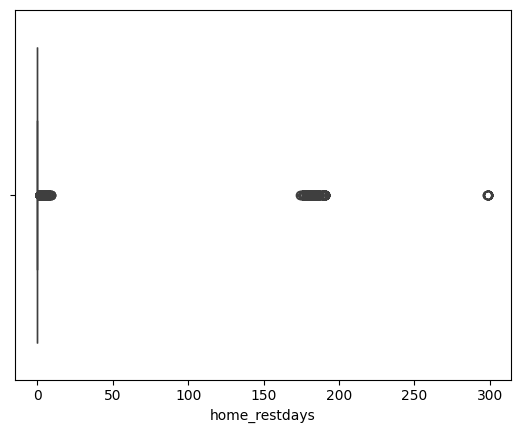

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


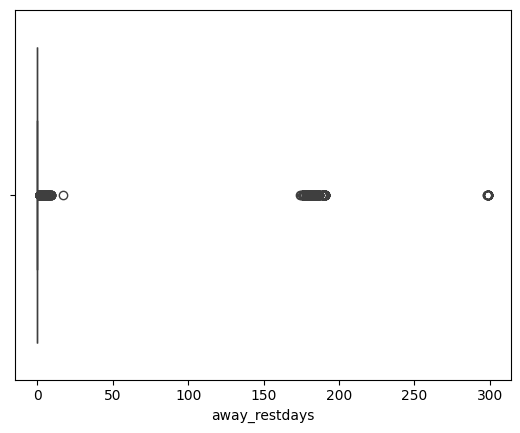

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


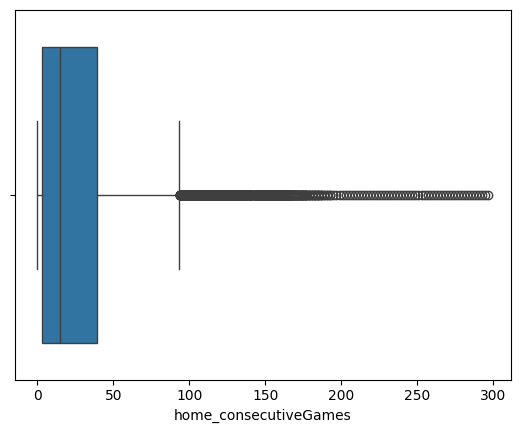

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


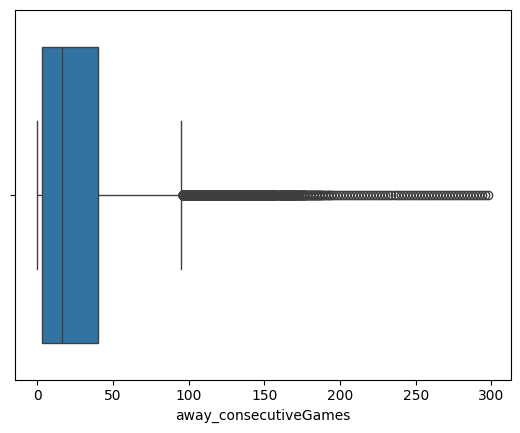

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


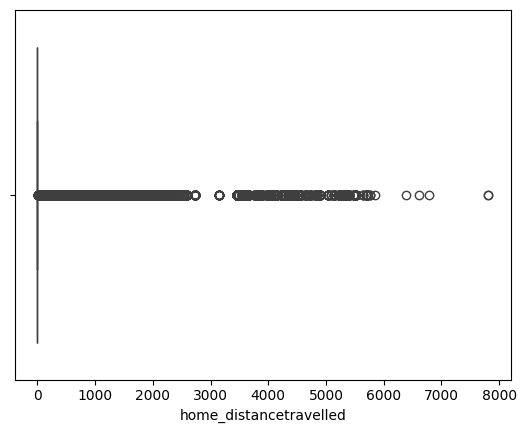

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


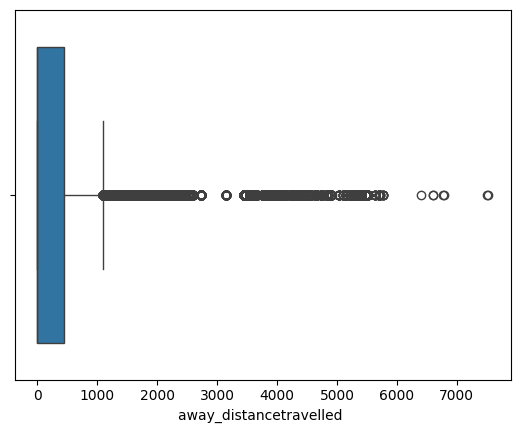

In [303]:
for i in numeric.columns:
    sns.boxplot(x=numeric[i], )
    plt.show()

In [304]:
# profile = ProfileReport(astro_df, title="Exploratory Data Analysis")

In [305]:
# profile.to_notebook_iframe()

In [321]:
astro_df

,game_date,home_team,away_team,is_day_game,home_score,away_score,away_pa,away_1b,away_2b,away_3b,away_hr,away_fo,away_so,away_bb,away_hbp,home_pa,home_1b,home_2b,home_3b,home_hr,home_fo,home_so,home_bb,home_hbp,home_ops,away_ops,home_restdays,away_restdays,home_consecutiveGames,away_consecutiveGames,home_distancetravelled,away_distancetravelled
2,2000-04-03,ATL,COL,True,2,0,34,4,2,0,0,19,7,2,0,32,5,0,0,2,17,6,1,1,0.714583,0.485294,0,0,0,0,0.00000,0.0
3,2000-04-03,CIN,MIL,True,3,3,27,6,1,0,0,14,1,5,0,20,3,1,0,1,10,4,1,0,0.773684,0.808081,0,0,0,0,0.00000,0.0
4,2000-04-03,FLO,SFN,False,6,4,36,5,2,2,1,17,8,1,0,38,9,3,0,0,17,7,1,1,0.785088,0.848413,0,0,0,0,0.00000,0.0
5,2000-04-03,MON,LAN,False,4,10,43,6,0,1,2,26,4,4,0,38,7,0,0,2,19,8,2,0,0.706140,0.738223,0,0,0,0,0.00000,0.0
6,2000-04-03,NYN,SDN,True,2,1,33,4,0,0,1,19,8,0,1,30,2,1,0,1,16,7,2,1,0.529630,0.431818,4,0,0,0,5851.33798,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56770,2023-10-01,CHA,SDN,True,1,2,44,6,1,0,0,22,8,7,0,44,7,0,0,0,17,16,3,1,0.425000,0.534398,0,0,41,42,0.00000,0.0
56771,2023-10-01,DET,CLE,True,5,2,34,3,1,0,1,20,8,1,0,38,4,4,0,1,16,7,6,0,0.894737,0.449198,0,0,43,44,0.00000,0.0
56772,2023-10-01,KCA,NYA,True,5,2,35,4,3,0,0,18,7,3,0,35,7,0,1,3,15,8,1,0,0.989916,0.598214,0,0,45,46,0.00000,0.0
56773,2023-10-01,SEA,TEX,True,1,0,30,3,1,0,0,15,11,0,0,30,4,0,0,0,14,10,1,1,0.342857,0.300000,0,0,47,48,0.00000,0.0


In [307]:
# Drop unnecessary columns
columns_to_drop = ['venue', 'venue_name', 'state', 'city']

astro_df.drop(columns_to_drop, axis=1, inplace=True)

In [308]:
astro_df

,game_date,home_team,away_team,is_day_game,home_score,away_score,away_pa,away_1b,away_2b,away_3b,away_hr,away_fo,away_so,away_bb,away_hbp,home_pa,home_1b,home_2b,home_3b,home_hr,home_fo,home_so,home_bb,home_hbp,home_ops,away_ops,home_restdays,away_restdays,home_consecutiveGames,away_consecutiveGames,home_distancetravelled,away_distancetravelled
2,2000-04-03,ATL,COL,True,2,0,34,4,2,0,0,19,7,2,0,32,5,0,0,2,17,6,1,1,0.714583,0.485294,0,0,0,0,0.00000,0.0
3,2000-04-03,CIN,MIL,True,3,3,27,6,1,0,0,14,1,5,0,20,3,1,0,1,10,4,1,0,0.773684,0.808081,0,0,0,0,0.00000,0.0
4,2000-04-03,FLO,SFN,False,6,4,36,5,2,2,1,17,8,1,0,38,9,3,0,0,17,7,1,1,0.785088,0.848413,0,0,0,0,0.00000,0.0
5,2000-04-03,MON,LAN,False,4,10,43,6,0,1,2,26,4,4,0,38,7,0,0,2,19,8,2,0,0.706140,0.738223,0,0,0,0,0.00000,0.0
6,2000-04-03,NYN,SDN,True,2,1,33,4,0,0,1,19,8,0,1,30,2,1,0,1,16,7,2,1,0.529630,0.431818,4,0,0,0,5851.33798,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56770,2023-10-01,CHA,SDN,True,1,2,44,6,1,0,0,22,8,7,0,44,7,0,0,0,17,16,3,1,0.425000,0.534398,0,0,41,42,0.00000,0.0
56771,2023-10-01,DET,CLE,True,5,2,34,3,1,0,1,20,8,1,0,38,4,4,0,1,16,7,6,0,0.894737,0.449198,0,0,43,44,0.00000,0.0
56772,2023-10-01,KCA,NYA,True,5,2,35,4,3,0,0,18,7,3,0,35,7,0,1,3,15,8,1,0,0.989916,0.598214,0,0,45,46,0.00000,0.0
56773,2023-10-01,SEA,TEX,True,1,0,30,3,1,0,0,15,11,0,0,30,4,0,0,0,14,10,1,1,0.342857,0.300000,0,0,47,48,0.00000,0.0


### Stack Home and Away Teams


In [309]:
home_cols = ['game_date','home_team', 'home_score', 'home_pa', 'home_1b', 
             'home_2b', 'home_3b', 'home_hr', 'home_fo', 'home_so',
            'home_bb', 'home_hbp', 'is_day_game', 'home_restdays', 'home_distancetravelled', "home_ops", "home_consecutiveGames"]

away_cols = ['game_date','away_team', 'away_score', 'away_pa', 'away_1b', 
             'away_2b', 'away_3b', 'away_hr', 'away_fo', 'away_so',
            'away_bb', 'away_hbp', 'is_day_game', 'away_restdays', 'away_distancetravelled ', "away_ops", "away_consecutiveGames"]

In [310]:
home_df = astro_df[home_cols]
away_df = astro_df[away_cols]

In [311]:
# Add away team identifier
home_df.insert(0, 'is_away', 0)

In [312]:
away_df.insert(0, 'is_away', 1)

In [313]:
away_df

,is_away,game_date,away_team,away_score,away_pa,away_1b,away_2b,away_3b,away_hr,away_fo,away_so,away_bb,away_hbp,is_day_game,away_restdays,away_distancetravelled,away_ops,away_consecutiveGames
2,1,2000-04-03,COL,0,34,4,2,0,0,19,7,2,0,True,0,0.0,0.485294,0
3,1,2000-04-03,MIL,3,27,6,1,0,0,14,1,5,0,True,0,0.0,0.808081,0
4,1,2000-04-03,SFN,4,36,5,2,2,1,17,8,1,0,False,0,0.0,0.848413,0
5,1,2000-04-03,LAN,10,43,6,0,1,2,26,4,4,0,False,0,0.0,0.738223,0
6,1,2000-04-03,SDN,1,33,4,0,0,1,19,8,0,1,True,0,0.0,0.431818,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56770,1,2023-10-01,SDN,2,44,6,1,0,0,22,8,7,0,True,0,0.0,0.534398,42
56771,1,2023-10-01,CLE,2,34,3,1,0,1,20,8,1,0,True,0,0.0,0.449198,44
56772,1,2023-10-01,NYA,2,35,4,3,0,0,18,7,3,0,True,0,0.0,0.598214,46
56773,1,2023-10-01,TEX,0,30,3,1,0,0,15,11,0,0,True,0,0.0,0.300000,48


In [314]:
home_df = home_df.rename(columns={'home_team':'team', 'home_score':'score', 'home_pa':'pa', 'home_1b':'singles',
                       'home_2b': 'doubles', 'home_3b': 'triples', 'home_hr':'homeruns', 'home_fo':'field_outs',
                       'home_so':'strikeouts', 'home_bb':'num_walks', 'home_hbp':'hit_by_pitches', 'home_distancetravelled':'distancetravelled', "home_restdays":"restdays", "home_ops":"ops", "home_consecutiveGames":"consecutiveGames"})

In [315]:
away_df = away_df.rename(columns={'away_team':'team', 'away_score':'score', 'away_pa':'pa', 'away_1b':'singles',
                       'away_2b': 'doubles', 'away_3b': 'triples', 'away_hr':'homeruns', 'away_fo':'field_outs',
                       'away_so':'strikeouts', 'away_bb':'num_walks', 'away_hbp':'hit_by_pitches', 'away_distancetravelled ':'distancetravelled', "away_restdays":"restdays", "away_ops":"ops", "away_consecutiveGames":"consecutiveGames"})

In [316]:
home_df

,is_away,game_date,team,score,pa,singles,doubles,triples,homeruns,field_outs,strikeouts,num_walks,hit_by_pitches,is_day_game,restdays,distancetravelled,ops,consecutiveGames
2,0,2000-04-03,ATL,2,32,5,0,0,2,17,6,1,1,True,0,0.00000,0.714583,0
3,0,2000-04-03,CIN,3,20,3,1,0,1,10,4,1,0,True,0,0.00000,0.773684,0
4,0,2000-04-03,FLO,6,38,9,3,0,0,17,7,1,1,False,0,0.00000,0.785088,0
5,0,2000-04-03,MON,4,38,7,0,0,2,19,8,2,0,False,0,0.00000,0.706140,0
6,0,2000-04-03,NYN,2,30,2,1,0,1,16,7,2,1,True,4,5851.33798,0.529630,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56770,0,2023-10-01,CHA,1,44,7,0,0,0,17,16,3,1,True,0,0.00000,0.425000,41
56771,0,2023-10-01,DET,5,38,4,4,0,1,16,7,6,0,True,0,0.00000,0.894737,43
56772,0,2023-10-01,KCA,5,35,7,0,1,3,15,8,1,0,True,0,0.00000,0.989916,45
56773,0,2023-10-01,SEA,1,30,4,0,0,0,14,10,1,1,True,0,0.00000,0.342857,47


In [317]:
stacked_df = pd.concat([home_df, away_df], ignore_index=True)
stacked_df

,is_away,game_date,team,score,pa,singles,doubles,triples,homeruns,field_outs,strikeouts,num_walks,hit_by_pitches,is_day_game,restdays,distancetravelled,ops,consecutiveGames
0,0,2000-04-03,ATL,2,32,5,0,0,2,17,6,1,1,True,0,0.00000,0.714583,0
1,0,2000-04-03,CIN,3,20,3,1,0,1,10,4,1,0,True,0,0.00000,0.773684,0
2,0,2000-04-03,FLO,6,38,9,3,0,0,17,7,1,1,False,0,0.00000,0.785088,0
3,0,2000-04-03,MON,4,38,7,0,0,2,19,8,2,0,False,0,0.00000,0.706140,0
4,0,2000-04-03,NYN,2,30,2,1,0,1,16,7,2,1,True,4,5851.33798,0.529630,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113525,1,2023-10-01,SDN,2,44,6,1,0,0,22,8,7,0,True,0,0.00000,0.534398,42
113526,1,2023-10-01,CLE,2,34,3,1,0,1,20,8,1,0,True,0,0.00000,0.449198,44
113527,1,2023-10-01,NYA,2,35,4,3,0,0,18,7,3,0,True,0,0.00000,0.598214,46
113528,1,2023-10-01,TEX,0,30,3,1,0,0,15,11,0,0,True,0,0.00000,0.300000,48


In [322]:
mean_ops_per_team = stacked_df.groupby(['team'])["ops"].mean()
deviation_ops_per_team = []
for index, row in stacked_df.iterrows():
    deviation_ops_per_team.append(row["ops"] - mean_ops_per_team[row['team']])
stacked_df["ops_deviation_from_mean"] = deviation_ops_per_team
stacked_df


,is_away,game_date,team,score,pa,singles,doubles,triples,homeruns,field_outs,strikeouts,num_walks,hit_by_pitches,is_day_game,restdays,distancetravelled,ops,consecutiveGames,ops_deviation_from_mean
0,0,2000-04-03,ATL,2,32,5,0,0,2,17,6,1,1,True,0,0.00000,0.714583,0,-0.009377
1,0,2000-04-03,CIN,3,20,3,1,0,1,10,4,1,0,True,0,0.00000,0.773684,0,0.061721
2,0,2000-04-03,FLO,6,38,9,3,0,0,17,7,1,1,False,0,0.00000,0.785088,0,0.064675
3,0,2000-04-03,MON,4,38,7,0,0,2,19,8,2,0,False,0,0.00000,0.706140,0,0.002544
4,0,2000-04-03,NYN,2,30,2,1,0,1,16,7,2,1,True,4,5851.33798,0.529630,0,-0.173097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113525,1,2023-10-01,SDN,2,44,6,1,0,0,22,8,7,0,True,0,0.00000,0.534398,42,-0.148585
113526,1,2023-10-01,CLE,2,34,3,1,0,1,20,8,1,0,True,0,0.00000,0.449198,44,-0.274666
113527,1,2023-10-01,NYA,2,35,4,3,0,0,18,7,3,0,True,0,0.00000,0.598214,46,-0.154978
113528,1,2023-10-01,TEX,0,30,3,1,0,0,15,11,0,0,True,0,0.00000,0.300000,48,-0.436342


In [319]:
stacked_df.to_csv("./../data/processed/stacked_df_cleaned.csv")